## Tarefas de classificação na base de dados do ENEM.

##### Alunos:

-   Gabriel Fonseca (2111066)
-   Yasmim Santos (2116925)
-   Alejandro Elias (2111189)
-   Pedro Lucas (2111131)

Base de dados escolhida - Exame Nacional do Ensino Médio (Enem): https://basedosdados.org/dataset/3e9c8804-c31c-4f48-9a45-d67f1c21a859


### Importando as dependências:


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Lendo e visualizando os dados:


In [19]:
df_enem = pd.read_csv(
    f"../data/out/enem-dados-tratados.csv",
    dtype={
        "id_inscricao": np.int64,
        "ensino": int,
        "nota_ciencias_natureza": float,
        "nota_ciencias_humanas": float,
        "nota_linguagens_codigos": float,
        "nota_matematica": float,
        "nota_redacao": float,
        "q_formacao_pai": str,
        "q_formacao_mae": str,
        "q_renda_familia": str,
    },
)

df_enem

,id_inscricao,ensino,nota_ciencias_natureza,nota_ciencias_humanas,nota_linguagens_codigos,nota_matematica,nota_redacao,q_formacao_pai,q_formacao_mae,q_renda_familia,ano
0,150001892848,3,366.8,436.9,374.2,331.4,380.0,B,A,C,2015
1,150002421428,1,512.0,636.9,552.0,549.2,760.0,A,A,C,2015
2,150004396764,1,470.8,519.3,465.2,350.8,580.0,B,A,B,2015
3,150001657786,1,492.6,641.2,553.2,649.5,840.0,A,A,A,2015
4,150005415838,1,473.3,533.4,443.3,447.4,400.0,A,A,A,2015
...,...,...,...,...,...,...,...,...,...,...,...
357268,210054596750,1,450.6,403.1,443.3,479.8,0.0,E,E,B,2022
357269,210056286560,1,416.5,427.3,484.6,376.2,0.0,D,D,A,2022
357270,210057495281,1,462.1,421.7,432.1,530.9,0.0,C,D,B,2022
357271,210056812211,1,519.1,570.4,537.3,388.7,0.0,D,H,B,2022


### Preparando os dados para utilização no modelo:


In [20]:
mm_scaler = MinMaxScaler()

df_enem = df_enem[df_enem["nota_ciencias_natureza"] != 0.0]
df_enem = df_enem[df_enem["nota_matematica"] != 0.0]

df_enem["nota_ciencias_natureza_scl"] = mm_scaler.fit_transform(
    df_enem[["nota_ciencias_natureza"]]
)
df_enem["nota_matematica_scl"] = mm_scaler.fit_transform(df_enem[["nota_matematica"]])

df_enem

,id_inscricao,ensino,nota_ciencias_natureza,nota_ciencias_humanas,nota_linguagens_codigos,nota_matematica,nota_redacao,q_formacao_pai,q_formacao_mae,q_renda_familia,ano,nota_ciencias_natureza_scl,nota_matematica_scl
0,150001892848,3,366.8,436.9,374.2,331.4,380.0,B,A,C,2015,0.111326,0.029058
1,150002421428,1,512.0,636.9,552.0,549.2,760.0,A,A,C,2015,0.367095,0.348694
2,150004396764,1,470.8,519.3,465.2,350.8,580.0,B,A,B,2015,0.294522,0.057529
3,150001657786,1,492.6,641.2,553.2,649.5,840.0,A,A,A,2015,0.332922,0.495891
4,150005415838,1,473.3,533.4,443.3,447.4,400.0,A,A,A,2015,0.298925,0.199296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357268,210054596750,1,450.6,403.1,443.3,479.8,0.0,E,E,B,2022,0.258940,0.246845
357269,210056286560,1,416.5,427.3,484.6,376.2,0.0,D,D,A,2022,0.198873,0.094805
357270,210057495281,1,462.1,421.7,432.1,530.9,0.0,C,D,B,2022,0.279197,0.321837
357271,210056812211,1,519.1,570.4,537.3,388.7,0.0,D,H,B,2022,0.379602,0.113149


In [21]:
X = np.array(df_enem[["nota_ciencias_natureza_scl"]])
Y = np.array(df_enem["nota_matematica_scl"])

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, random_state=5487
)

X_train: np.ndarray = X_train
Y_train: np.ndarray = Y_train
X_test: np.ndarray = X_test
Y_test: np.ndarray = Y_test

pd.DataFrame(X_train).head()

,0
0,0.216135
1,0.328695
2,0.229170
3,0.191298
4,0.304738


### Realizando a regressão:


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

linreg_params = {}
rfr_params = {"max_depth": 10, "max_features": "sqrt", "n_estimators": 200}
gbr_params = {"learning_rate": 0.1, "max_depth": 3, "n_estimators": 100}

linreg = LinearRegression(**linreg_params)
rfr = RandomForestRegressor(**rfr_params)
gbr = GradientBoostingRegressor(**gbr_params)

linreg.fit(X_train, Y_train)
rfr.fit(X_train, Y_train)
gbr.fit(X_train, Y_train)

result_linreg = linreg.score(X_test, Y_test)
result_rfr = rfr.score(X_test, Y_test)
result_gbr = gbr.score(X_test, Y_test)

pd.DataFrame(
    {
        "Acurácia Reg. Linear": [f"{result_linreg:.2%}"],
        "Acurácia RFR": [f"{result_rfr:.2%}"],
        "Acurácia GBR": [f"{result_gbr:.2%}"],
    }
)

,Acurácia Reg. Linear,Acurácia RFR,Acurácia GBR
0,50.09%,59.27%,59.35%


### Extraindo métricas de performance:


In [23]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_squared_log_error as msle,
    median_absolute_error as medae,
    explained_variance_score as evs,
)

Y_pred_linreg = linreg.predict(X_test)
Y_pred_rfr = rfr.predict(X_test)
Y_pred_gbr = gbr.predict(X_test)

pd.DataFrame(
    {
        "Modelos": ["Regressão Linear", "Random Forest", "Gradient Boosting"],
        "MSE": [
            mse(Y_test, Y_pred_linreg),
            mse(Y_test, Y_pred_rfr),
            mse(Y_test, Y_pred_gbr),
        ],
        "MAE": [
            mae(Y_test, Y_pred_linreg),
            mae(Y_test, Y_pred_rfr),
            mae(Y_test, Y_pred_gbr),
        ],
        "MSLE": [
            msle(Y_test, Y_pred_linreg),
            msle(Y_test, Y_pred_rfr),
            msle(Y_test, Y_pred_gbr),
        ],
        "MEDAE": [
            medae(Y_test, Y_pred_linreg),
            medae(Y_test, Y_pred_rfr),
            medae(Y_test, Y_pred_gbr),
        ],
        "EVS": [
            evs(Y_test, Y_pred_linreg),
            evs(Y_test, Y_pred_rfr),
            evs(Y_test, Y_pred_gbr),
        ],
    }
)

,Modelos,MSE,MAE,MSLE,MEDAE,EVS
0,Regressão Linear,0.012884,0.090316,0.007903,0.076233,0.500967
1,Random Forest,0.010516,0.080186,0.006468,0.067092,0.592665
2,Gradient Boosting,0.010494,0.080102,0.006457,0.067084,0.593512


### Plotando resultados:


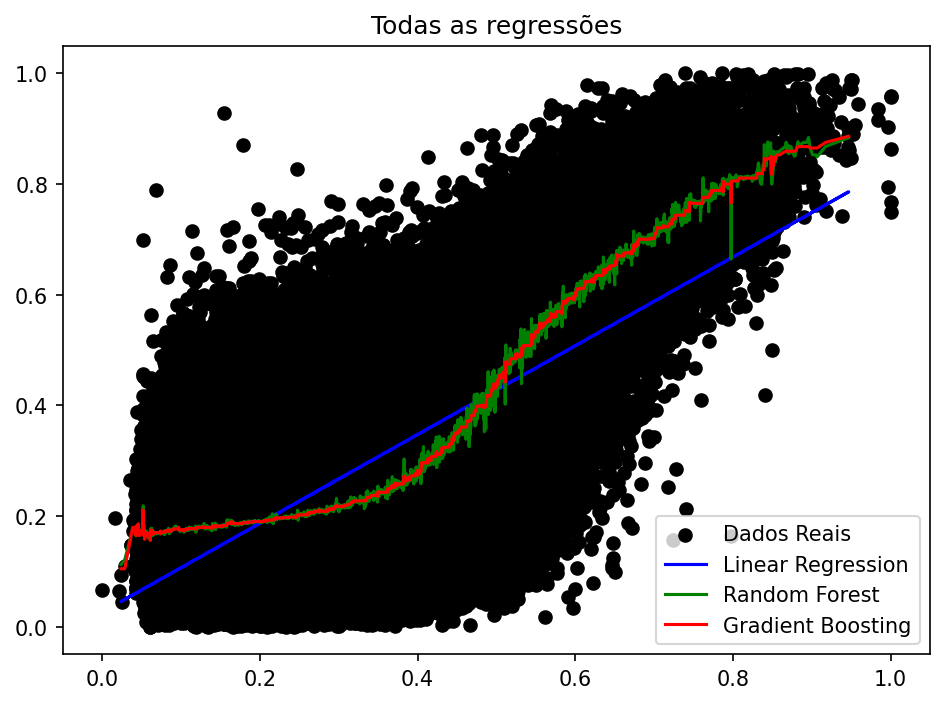

In [24]:
sorted_idx = np.argsort(X_test, axis=0).flatten()
X_test_sorted = X_test[sorted_idx]
Y_pred_rfr_sorted = Y_pred_rfr[sorted_idx]
Y_pred_gbr_sorted = Y_pred_gbr[sorted_idx]

plt.figure(dpi=150)

plt.scatter(X, Y, color="black", label="Dados Reais")
plt.plot(X_test, Y_pred_linreg, color="blue", label="Linear Regression")

plt.plot(X_test_sorted, Y_pred_rfr_sorted, color="green", label="Random Forest")
plt.plot(X_test_sorted, Y_pred_gbr_sorted, color="red", label="Gradient Boosting")

plt.title("Todas as regressões")
plt.legend()
plt.tight_layout()
plt.show()

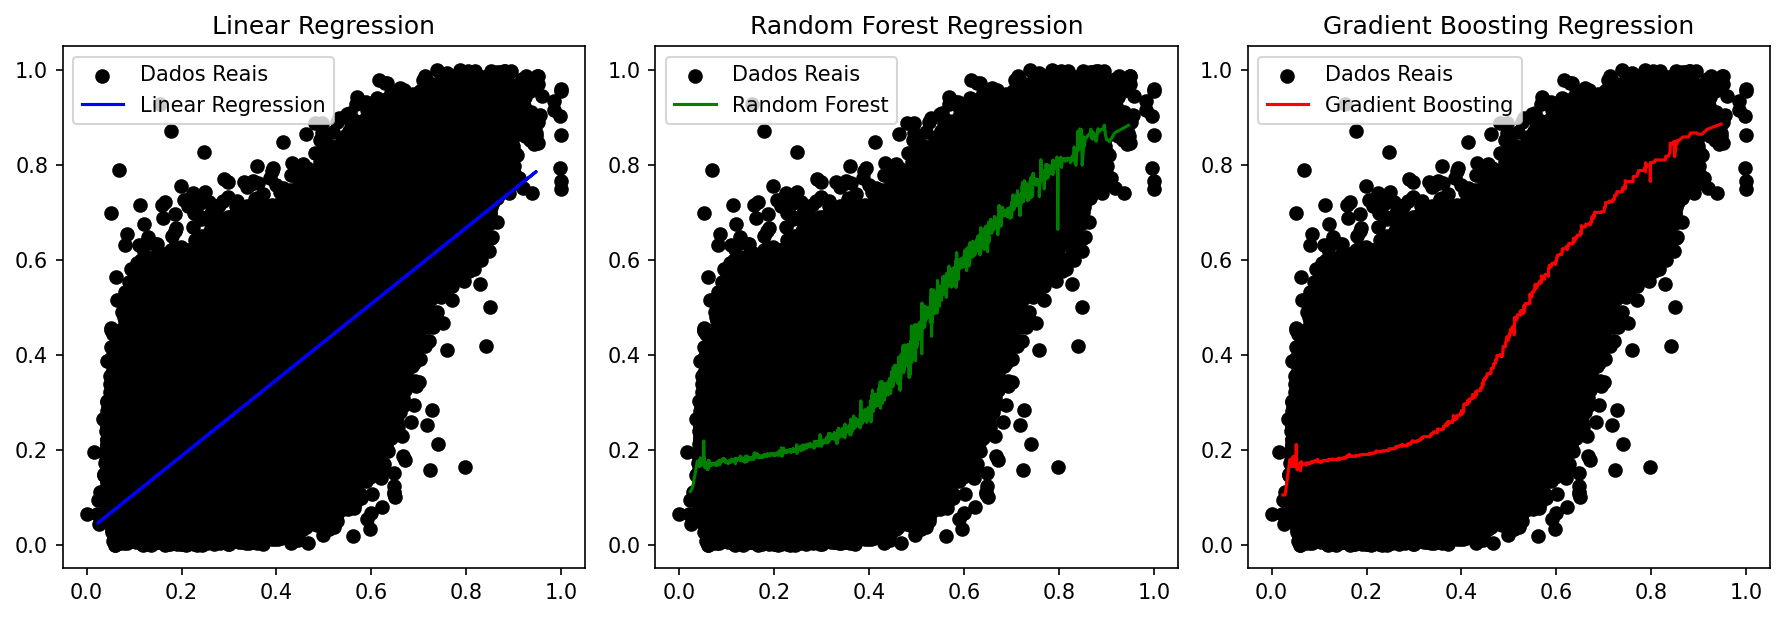

In [25]:
plt.figure(figsize=(12, 8), dpi=150)

plt.subplot(1, 3, 1, aspect="equal")
plt.scatter(X, Y, color="black", label="Dados Reais")
plt.plot(X_test, Y_pred_linreg, color="blue", label="Linear Regression")
plt.title("Linear Regression")
plt.legend()

plt.subplot(1, 3, 2, aspect="equal")
plt.scatter(X, Y, color="black", label="Dados Reais")
plt.plot(X_test_sorted, Y_pred_rfr_sorted, color="green", label="Random Forest")
plt.title("Random Forest Regression")
plt.legend()

plt.subplot(1, 3, 3, aspect="equal")
plt.scatter(X, Y, color="black", label="Dados Reais")
plt.plot(X_test_sorted, Y_pred_gbr_sorted, color="red", label="Gradient Boosting")
plt.title("Gradient Boosting Regression")
plt.legend()

plt.tight_layout()
plt.show()